# week2-sesion1

# 【課題１】断面図を描こう
#### 前述の断面図をMatplotlibを使い作成してください。x=136の地点の赤い点や矢印も表示させてください。
#### これ以降の問題では下りる過程の可視化を行いますが、その際にはこの断面図を活用してください。

In [2]:
import numpy as np
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


Text(100, 2000, 'you')

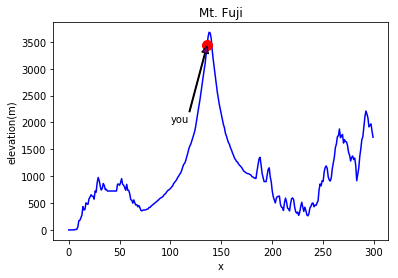

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#断面図のグラフの作成
plt.title("Mt. Fuji")
plt.xlabel("x")
plt.ylabel("elevation(m)")
plt.plot(fuji[:,0],fuji[:,3], color='blue')

#現在地の説明
plt.plot(136, fuji[136,3],marker = 'o',color = 'red',markersize = 10)

#矢印の作成
plt.annotate(
'you',
xy=(136,fuji[136,3]),
xytext=(100,2000),
arrowprops = dict(facecolor='purple', width =1.0,headwidth=7.0,headlength=7.0,shrink=0.01
))

# 【課題2】勾配の計算の関数

In [10]:
#勾配を計算する関数
#input:今いる地点：x

#output:今いる地点の勾配

def gradient_calculate(x):
    #今いる地点が0の場合
    if x == 0:
        print('1~299の整数で入力してください')

    #今いる地点が0以外の場合
    else:
        #エラー処理
        try:
            #xの変化量
            delta_x = fuji[x, 0] - fuji[x-1, 0]
            #yの変化量
            delta_y = fuji[x, 3] - fuji[x-1, 3]

            return delta_y / delta_x
        
        #IndexError：範囲外のとき
        except IndexError:
            print('1~299の整数で入力してください')

        #TypeError：型が違う時
        except TypeError:
            print('1~299の整数で入力してください')

# 【課題3】勾配降下法の関数を作成
#### 授業前課題では各地点での勾配を最初に求めました。
#### しかし、暗闇の富士山の比喩を考えると、知ることができるのはあなたがいる地点の勾配だけです。

#### ここでは「あなたが今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成しましょう。この関数が返す値を「今いる地点の勾配」として次の問題で作成する関数内で使ってください。

input:今いる地点のx
output:移動すべき地点

In [15]:
#関数の作成

def gradient_descent_method(x,a=0.3):
    if x == 0:
        return '1~299の整数で入力してください'

    #今いる地点が0以外の場合
    else:
        #エラー処理
        try:
            return int(round(x - a * gradient_calculate(x)))

       #IndexError：範囲外のとき
        except IndexError:
            print('1~299の整数で入力してください')

       #TypeError：型が違う時
        except TypeError:
            print('1~299の整数で入力してください')

#x=136を代入
gradient_descent_method(136)

85

In [16]:
#試行回数をn回ときめ、リストにxの変遷を格納してゆく。

x_movement = []
x_next = 136

for i in range(0,100):
    x_movement.append(gradient_descent_method(x_next)) #リストに計算結果を格納
    x_next = gradient_descent_method(x_next)

#リストを可視化
x_movement[0:10]

[85, 80, 79, 71, 86, 82, 77, 74, 73, 69]

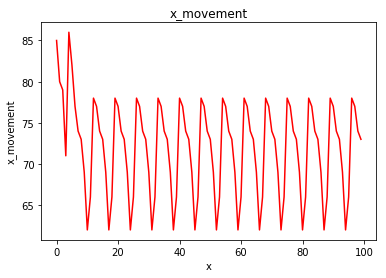

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("x_movement")
plt.xlabel("x")
plt.ylabel("x_movement")
plt.plot(x_movement, color='red') 

# 【課題4】初期値の変更

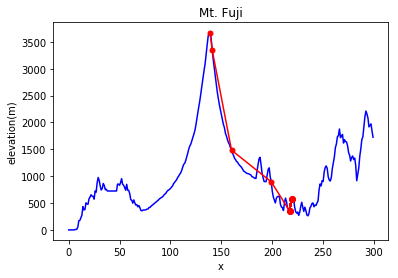

In [18]:
#x=139スタート
x_next = 139
#xのリスト
x_movement = [x_next]
#学習率
a = 0.1

#試行回数をn回ときめ、リストにxの変遷を格納してゆく。
for i in range(0,100):
   x_movement.append(gradient_descent_method(x_next, a)) #リストに計算結果を格納
   x_next = gradient_descent_method(x_next)

#移動の過程のグラフ
plt.title('Mt. Fuji')
plt.xlabel('x')
plt.ylabel('elevation(m)')
plt.plot(fuji[:, 0], fuji[:, 3], color='blue')
plt.plot(fuji[x_movement, 0], fuji[x_movement, 3], marker='o', color = 'red', markersize = 5);

# ※未解決【課題5】アドバンスト課題　並列計算
初期値によって結果が変化するわけですから、0から299まで全ての初期値の計算を行ってみるということを考えられます。
for文を使い繰り返すこともできますが、NumPyの配列を工夫して使うことで複数の計算を同時に行うことができます。ここまで作成した関数を複数の初期値が同時に計算できるように改良してください。
この改良は次のハイパーパラメータの検証にも応用することができます。
ヒント
NumPyは配列間で四則演算などの操作が可能です。以下のサンプルコードの3行目と4行目の挙動を参考にしてください。特に4行目の計算はブロードキャストと呼ばれるNumPy独特の機能であるため、各自でも調査してください。

In [19]:
array1 = np.ones(300)
array2 = np.arange(300)
array3 = array1*array2
all_points = array3 + 1
#all_elevation = fuji[all_points.astype(int),3]
print(all_points,all_elevation)

NameError: name 'all_elevation' is not defined

In [20]:
#配列対応の関数への修正①
#xは初期配列である
def gradient_calculate_beta(x):
    x = x.astype(int)
    #xが配列ではない場合。
    if type(x) != np.ndarray:
        print('配列を入力してください')
    #xが配列ではあるが、すべてが整数型ではない場合。
    else:
        #xの変化量
        delta_x = x
        #yの変化量
        delta_y = fuji[x,3]-fuji[x-1,3]
    return delta_y / delta_x
#len(np.diff(all_points) - a * np.diff(fuji[all_points,3]) / np.diff(all_points))

gradient_calculate_beta(all_points)
all_points

IndexError: index 300 is out of bounds for axis 0 with size 300

In [21]:
#配列対応の関数の作成②
def gradient_descent_method_beta(x, a=0.2):
    if type(x) != np.ndarray:
        return '配列を入力して下さい' #配列内に対象外の数値やデータが入っていた場合の例外処理は？
    else:
        return np.


gradient_descent_method_beta(all_points, a=0.2)

SyntaxError: invalid syntax (<ipython-input-21-3b27a397554a>, line 6)

In [22]:
#試行回数をn回ときめ、リストにxの変遷を格納してゆく。

x_movement = []
x_next = all_points.astype(int)

for i in range(0,5):
    x_movement = np.concatenate((x_movement, x_next),axis =0)
    x_next = (gradient_descent_method_beta(x_next)).astype(int)
#   print(gradient_descent_method(x_next))#リストに計算結果を格納
#    

#リストを可視化
x_movement[1]

NameError: name 'gradient_descent_method_beta' is not defined

# 【問題6】（アドバンス課題）ハイパーパラメータの検証
勾配降下法の中で 
α
 はハイパーパラメータであり、前の問題でも複数試して良い結果が得られるものを探しました。これを発展させ、
α
 を一定間隔で変化させていき、それぞれの山の下り方の比較を行ってください。うまい下り方となる 
α
 を見つけるだけではなく、大きかったり小さかった時にどうなるのかを検証して説明してください。

ヒント

検証のための一例として、横軸を 
α
 、縦軸を一定回の繰り返し後のxや標高にした散布図を描いてみるという方法が考えられます。

# 【問題7】（アドバンス課題）局所最適解
山を下りることで最終的には海（標高が0）に向かいたいですが、勾配降下法は「局所的最適解」となる地点にしか到達しない可能性があります。局所的最適解とはどういったもので、それへの対策はどういったことができるかを調査して説明してください。

言葉だけではなく、作成した関数も活用できると良いでしょう。